In [4]:
import pandas as pandas
import numpy as np

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [6]:
train_dir = 'DATASET\TRAIN'
test_dir = 'DATASET\TEST'

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [8]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [9]:
test_datagen

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical'
)

Found 22564 images belonging to 3 classes.


In [11]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 2907 images belonging to 3 classes.


In [12]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [13]:
for layer in base_model.layers:
    layer.trainable = False

In [14]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

In [15]:
model = Model(inputs=base_model.input, outputs=predictions)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

c:\Users\Divyanshu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 863ms/step - accuracy: 0.5828 - loss: 0.9585

c:\Users\Divyanshu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 685s 963ms/step - accuracy: 0.5828 - loss: 0.9584 - val_accuracy: 0.5869 - val_loss: 0.8967
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 563s 797ms/step - accuracy: 0.6358 - loss: 0.8421 - val_accuracy: 0.5965 - val_loss: 0.8869
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 563s 798ms/step - accuracy: 0.6472 - loss: 0.8260 - val_accuracy: 0.5862 - val_loss: 0.9009
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 559s 792ms/step - accuracy: 0.6555 - loss: 0.8079 - val_accuracy: 0.5370 - val_loss: 0.9786
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 558s 791ms/step - accuracy: 0.6692 - loss: 0.7992 - val_accuracy: 0.6113 - val_loss: 0.8810
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 557s 789ms/step - accuracy: 0.6700 - loss: 0.7871 - val_accuracy: 0.5765 - val_loss: 0.9161
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 558s 791ms/step - accuracy: 0.6660 - loss: 0.7912 - val_accuracy: 0.6388 - val_loss: 0.8500
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 558s 791ms/step - accuracy: 0.6648 - loss: 0.78

In [18]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}')

91/91 ━━━━━━━━━━━━━━━━━━━━ 44s 483ms/step - accuracy: 0.6271 - loss: 0.8610
Test Accuracy: 0.62


In [19]:
import matplotlib.pyplot as plt
import pandas as pd


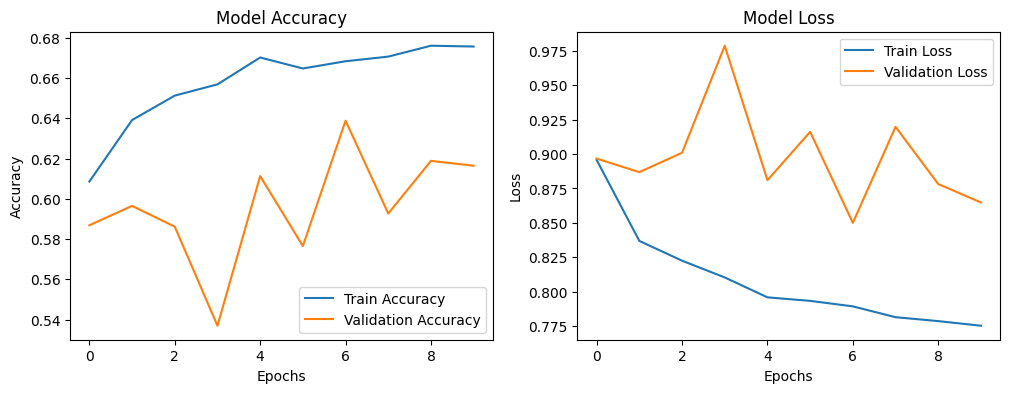

In [20]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [22]:
# Create a DataFrame for results
results = {
    "Metric": ["Train Accuracy", "Validation Accuracy", "Test Accuracy"],
    "Value": [max(history.history['accuracy']), max(history.history['val_accuracy']), test_acc]
}

results_df = pd.DataFrame(results)

# Display the results DataFrame
results_df


,Metric,Value
0,Train Accuracy,0.676033
1,Validation Accuracy,0.638803
2,Test Accuracy,0.616443


91/91 ━━━━━━━━━━━━━━━━━━━━ 62s 646ms/step


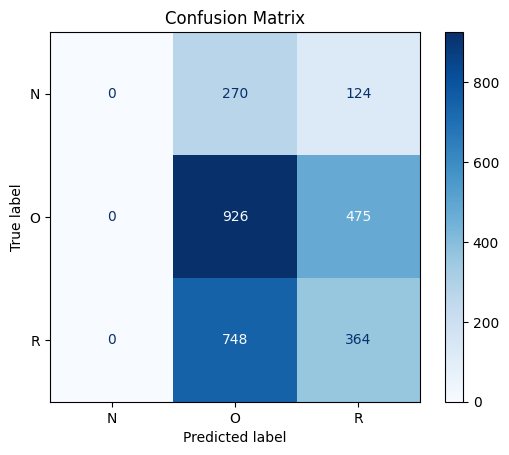

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions from the test generator
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
